# # Final Submission for Introduction to Data Analytics for Business

My Final Submission is a study of tech salaries from multinational companies based in Ireland. The data is scraped from Levels.fyi. 
I will compare and contrast different career levels across different companies

## Import any Libraries required for the project

In [1]:
import pandas as pd 
import pandas_profiling as pp
import requests
import numpy as np 
import missingno as msno
import matplotlib.pyplot as plt 
import seaborn as sns 

# Import data

In [2]:
data = requests.get('https://www.levels.fyi/js/salaryData.json').json()
df = pd.DataFrame(data)

# Inspect the dataframe

In [3]:
#check if the data has imported ok using head()
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,186,"Redwood City, CA",1,1,,160,17,9,,,7392,807,1
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,0,"San Francisco, CA",3,4,,0,0,0,,,7419,807,2
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,126,"Seattle, WA",10,0,,126,0,0,,,11527,819,3
3,6/14/2017 21:22:25,Microsoft,64,Software Engineering Manager,171348,"Redmond, WA",13,13,,92799,55371,23178,,,11521,819,5
4,6/16/2017 10:44:01,Amazon,L5,Software Engineer,214175,"Vancouver, BC, Canada",13,1,,156335,0,57840,,,1320,0,6


In [4]:
#Check how many rows and columns are in the dataframe
df.shape

(62642, 17)

In [5]:
#Check the datatypes
df.dtypes

timestamp                  object
company                    object
level                      object
title                      object
totalyearlycompensation    object
location                   object
yearsofexperience          object
yearsatcompany             object
tag                        object
basesalary                 object
stockgrantvalue            object
bonus                      object
gender                     object
otherdetails               object
cityid                     object
dmaid                      object
rowNumber                   int64
dtype: object

In [6]:
# Examine dataframe to examine columns and structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   timestamp                62642 non-null  object
 1   company                  62642 non-null  object
 2   level                    62642 non-null  object
 3   title                    62642 non-null  object
 4   totalyearlycompensation  62642 non-null  object
 5   location                 62642 non-null  object
 6   yearsofexperience        62642 non-null  object
 7   yearsatcompany           62642 non-null  object
 8   tag                      62642 non-null  object
 9   basesalary               62642 non-null  object
 10  stockgrantvalue          62642 non-null  object
 11  bonus                    62642 non-null  object
 12  gender                   62642 non-null  object
 13  otherdetails             62642 non-null  object
 14  cityid                   62642 non-nul

In [7]:
#df.profile_report()

# Cleaning up the Data

I can see that I have at least three columns that I do not require - tag, otherdetails, dmaid and rownumber. I will drop these from my dataframe.
I can also see that the columns are classified as objects but should be numeric so will need to be converted: totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid

In [8]:
#Check the values for years at company for any anomolies
df['yearsatcompany'].unique()
#Can see people have entered in values of 90 - these rows should be dropped

array(['1', '4', '0', '13', '6', '2', '3', '11', '5', '7', '19', '14',
       '8', '10', '12', '9', '22', '15', '25', '16', '18', '17', '27',
       '21', '43', '20', '24', '31', '29', '34', '23', '47', '28', '42',
       '26', '30', '32', '37', '36', '33', '35', '38', '90', '39'],
      dtype=object)

In [9]:
#Check the values for years at company for any anomolies
df['yearsofexperience'].unique()
#Can see people have entered in values of 90 - these rows should be dropped

array(['1', '3', '10', '13', '6', '7', '16', '5', '4', '18', '15', '9',
       '17', '2', '8', '12', '20', '14', '11', '0', '26', '38', '25',
       '19', '21', '24', '23', '22', '29', '27', '33', '57', '30', '31',
       '28', '32', '35', '45', '36', '37', '34', '42', '41', '50', '49',
       '44', '47', '40', '48', '39', '43', '53', '46', '51', '58', '90'],
      dtype=object)

In [10]:
#Check the values for years at company for any anomolies
df['gender'].unique()
#I can see nulls, Male, Female, Other, Title: Senior Software Engineer - this will need to be cleaned up also


array(['', 'Male', 'Female', 'Other', 'Title: Senior Software Engineer'],
      dtype=object)

In [11]:
#Check the values for title for any anomolies
df['title'].unique()

array(['Product Manager', 'Software Engineer',
       'Software Engineering Manager', 'Data Scientist',
       'Solution Architect', 'Technical Program Manager',
       'Human Resources', 'Product Designer', 'Marketing',
       'Business Analyst', 'Hardware Engineer', 'Sales', 'Recruiter',
       'Mechanical Engineer', 'Management Consultant'], dtype=object)

In [12]:
#Replace empty and invalid entries for gender with NotDisclosed
df['gender'].replace(['Title: Senior Software Engineer',''],'NotDisclosed', inplace=True)
df['gender'].unique()

array(['NotDisclosed', 'Male', 'Female', 'Other'], dtype=object)

In [13]:
# Drop unwanted columns
#df = df.drop(['tag','otherdetails','dmaid','rowNumber'],axis=1)
df.drop(columns=['tag','otherdetails','dmaid','rowNumber'], inplace=True)

In [14]:
# Check the number of unique Companies
#print(df.company.nunique())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   timestamp                62642 non-null  object
 1   company                  62642 non-null  object
 2   level                    62642 non-null  object
 3   title                    62642 non-null  object
 4   totalyearlycompensation  62642 non-null  object
 5   location                 62642 non-null  object
 6   yearsofexperience        62642 non-null  object
 7   yearsatcompany           62642 non-null  object
 8   basesalary               62642 non-null  object
 9   stockgrantvalue          62642 non-null  object
 10  bonus                    62642 non-null  object
 11  gender                   62642 non-null  object
 12  cityid                   62642 non-null  object
dtypes: object(13)
memory usage: 6.2+ MB


In [15]:
#Check if companys are duplicated in the dataframe
df['company'].is_unique


False

In [16]:
#dealing with NA's
df.isna().sum()
# 0 means there are none

timestamp                  0
company                    0
level                      0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
basesalary                 0
stockgrantvalue            0
bonus                      0
gender                     0
cityid                     0
dtype: int64

In [17]:
#Check for duplicates
df.duplicated().sum()
#All 0s mean there are none
#We will need to remove this duplicated row

1

In [18]:
# Need to fix the syntax
df.drop_duplicates (subset=None, keep='first', inplace=True)
#Check again for duplicates - they should be gone now
df.duplicated().sum()

0

In [19]:
#Check for Nulls
df.isnull().sum()
#All 0s mean there are none

timestamp                  0
company                    0
level                      0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
basesalary                 0
stockgrantvalue            0
bonus                      0
gender                     0
cityid                     0
dtype: int64

In [20]:
# Convert some of the numeric columns that are classified as type 'object' to float and integar values
df[["totalyearlycompensation","basesalary","stockgrantvalue","bonus",]]=df[["totalyearlycompensation","basesalary","stockgrantvalue","bonus",]].astype(float)
df[["yearsofexperience","yearsatcompany","cityid"]]=df[["yearsofexperience","yearsatcompany","cityid"]].astype(int)


In [21]:
#Remove rows of data where the person has entered that they have over 50 years in the company
df=df[df['yearsatcompany']<51]

In [22]:
#Convert timestamp from object to datetime
df['timestamp']=pd.to_datetime(df['timestamp'])
#Remove the time - keep the date only
df['timestamp']=df['timestamp'].dt.date

In [23]:
#Rename columns for readability
df.columns = ["Date","Company","Level","Title","TCOMP","Location","YearsOfExperience","YearsOfService","BaseSalary","StockGrant","Bonus", "Gender", "CityId"]

In [24]:
#check that the un-required columns are gone from the dataframe and that the numeric values are no longer showing as object types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62640 entries, 0 to 62641
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               62640 non-null  object 
 1   Company            62640 non-null  object 
 2   Level              62640 non-null  object 
 3   Title              62640 non-null  object 
 4   TCOMP              62640 non-null  float64
 5   Location           62640 non-null  object 
 6   YearsOfExperience  62640 non-null  int32  
 7   YearsOfService     62640 non-null  int32  
 8   BaseSalary         62640 non-null  float64
 9   StockGrant         62640 non-null  float64
 10  Bonus              62640 non-null  float64
 11  Gender             62640 non-null  object 
 12  CityId             62640 non-null  int32  
dtypes: float64(4), int32(3), object(6)
memory usage: 6.0+ MB


In [25]:
#Maybe split the Location column?
#df[['City','Code']] = df['Location'].str.split(' ', expand=True)

In [26]:
df.describe()

,TCOMP,YearsOfExperience,YearsOfService,BaseSalary,StockGrant,Bonus,CityId
count,6.264000e+04,62640.000000,62640.000000,6.264000e+04,6.264000e+04,62640.000000,62640.000000
mean,3.175426e+03,7.189847,2.699266,1.798200e+03,1.134901e+03,242.324936,9856.023451
std,3.877939e+04,6.428678,3.506765,1.927224e+04,2.520652e+04,3709.246660,6678.977764
min,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.160000e+02,3.000000,0.000000,8.800000e+01,0.000000e+00,1.000000,7369.000000
50%,1.830000e+02,6.000000,1.000000,1.310000e+02,2.300000e+01,13.000000,7839.000000
75%,2.690000e+02,10.000000,4.000000,1.810000e+02,6.400000e+01,27.000000,11521.000000
max,3.386013e+06,58.000000,47.000000,2.057772e+06,3.140803e+06,384026.000000,47926.000000


In [27]:
#print(df.Company.unique())
df['Company'].is_unique

False

Take a quick look at the survey results

In [28]:
#Mean Number of years the person was in the company at the time of the survey
print("Mean Years of Service: " + str(df['YearsOfService'].mean()))

#Average Number of years of Experience the person had at the time of the survey
print("Mean Years of Experience: " + str(df['YearsOfExperience'].mean()))


Mean Years of Service: 2.6992656449553003
Mean Years of Experience: 7.1898467432950195


In [29]:
# Are there any entries for Intel?
Intel=(df['Company'] == 'Intel')
df.loc[Intel]
#941 entries

,Date,Company,Level,Title,TCOMP,Location,YearsOfExperience,YearsOfService,BaseSalary,StockGrant,Bonus,Gender,CityId
129,2017-10-31,Intel,G6,Software Engineering Manager,158.0,"Hillsboro, OR",9,3,136.0,12.0,10.0,NotDisclosed,10500
411,2018-04-04,Intel,Grade 6,Software Engineer,63913.0,"Hillsboro, OR",3,3,51713.0,4186.0,8014.0,NotDisclosed,10500
475,2018-04-22,Intel,Staff,Software Engineer,0.0,"Folsom, CA",5,9,0.0,0.0,0.0,Male,7193
506,2018-04-28,Intel,grade 6,Software Engineer,11014.0,"Santa Clara, CA",3,2,148.0,6543.0,4323.0,Male,7434
510,2018-04-30,Intel,Staff (Grade 8),Software Engineer,167.0,"Hillsboro, OR",5,5,141.0,15.0,11.0,Male,10500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62275,2021-08-13,Intel,6,Hardware Engineer,70.0,"Taipei, TP, Taiwan",3,0,61.0,7.0,2.0,Male,6744
62427,2021-08-15,Intel,L5,Software Engineer,73.0,"Haifa, HA, Israel",12,10,56.0,3.0,14.0,Male,4037
62458,2021-08-15,Intel,Grade 7,Software Engineer,220.0,"Hillsboro, OH",3,3,192.0,5.0,23.0,NotDisclosed,10304
62574,2021-08-16,Intel,Grade 8,Hardware Engineer,256.0,"Portland, OR",9,9,208.0,33.0,15.0,Male,10522


# Filter the dataframe for Multinational Companies of Interest based in Ireland

In [30]:
# Filter the datafame for Multinational Companies in Ireland

FilteredCompanies=['Intel','Microsoft','Google','Amazon','Facebook','Reddit','Gitlab']
Filtereddf=(df['Company'].isin(FilteredCompanies)  & df['Location'].str.contains('Ireland',na=False))
CompaniesInIrelanddf=df.loc[Filtereddf]
CompaniesInIrelanddf

,Date,Company,Level,Title,TCOMP,Location,YearsOfExperience,YearsOfService,BaseSalary,StockGrant,Bonus,Gender,CityId
48,2017-08-13,Amazon,L5,Software Engineer,231.0,"Dublin, DN, Ireland",11,3,115.0,115.0,1.0,NotDisclosed,4015
155,2017-11-30,Microsoft,62,Software Engineer,104973.0,"Dublin, DN, Ireland",17,6,92401.0,4350.0,8222.0,NotDisclosed,4015
347,2018-03-11,Google,L6,Software Engineering Manager,425.0,"Dublin, DN, Ireland",24,12,87.0,305.0,33.0,NotDisclosed,4015
348,2018-03-11,Google,5,Software Engineer,227.0,"Dublin, DN, Ireland",20,7,64.0,133.0,30.0,NotDisclosed,4015
349,2018-03-11,Facebook,L6,Software Engineering Manager,392.0,"Dublin, DN, Ireland",22,1,85.0,264.0,43.0,NotDisclosed,4015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61544,2021-08-09,Microsoft,64,Software Engineer,206.0,"Dublin, DN, Ireland",15,3,191.0,15.0,0.0,Male,4015
62416,2021-08-15,Google,L4,Software Engineer,186.0,"Dublin, DN, Ireland",9,1,150.0,24.0,12.0,Male,4015
62460,2021-08-15,Amazon,L5,Software Engineer,159.0,"Dublin, DN, Ireland",12,0,123.0,27.0,9.0,NotDisclosed,4015
62521,2021-08-16,Reddit,L4,Software Engineer,184.0,"Dublin, DN, Ireland",13,0,146.0,38.0,0.0,NotDisclosed,4015


In [31]:
CompaniesInIrelanddf.describe()

,TCOMP,YearsOfExperience,YearsOfService,BaseSalary,StockGrant,Bonus,CityId
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,2484.586207,7.896552,2.296552,1342.662069,293.910345,848.013793,4627.365517
std,19121.990375,6.416909,3.084739,10548.080655,2713.835278,7359.291701,3348.218637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4015.000000
25%,100.000000,3.000000,0.000000,69.000000,10.000000,6.000000,4015.000000
50%,141.000000,7.000000,1.000000,96.000000,21.000000,12.000000,4015.000000
75%,192.000000,11.000000,3.000000,130.000000,43.000000,22.000000,4015.000000
max,204135.000000,31.000000,20.000000,92401.000000,32457.000000,83681.000000,28920.000000


In [32]:
#High Earners
High_Earners = (CompaniesInIrelanddf['TCOMP'] > 200)
CompaniesInIrelanddf.loc[High_Earners]

,Date,Company,Level,Title,TCOMP,Location,YearsOfExperience,YearsOfService,BaseSalary,StockGrant,Bonus,Gender,CityId
48,2017-08-13,Amazon,L5,Software Engineer,231.0,"Dublin, DN, Ireland",11,3,115.0,115.0,1.0,NotDisclosed,4015
155,2017-11-30,Microsoft,62,Software Engineer,104973.0,"Dublin, DN, Ireland",17,6,92401.0,4350.0,8222.0,NotDisclosed,4015
347,2018-03-11,Google,L6,Software Engineering Manager,425.0,"Dublin, DN, Ireland",24,12,87.0,305.0,33.0,NotDisclosed,4015
348,2018-03-11,Google,5,Software Engineer,227.0,"Dublin, DN, Ireland",20,7,64.0,133.0,30.0,NotDisclosed,4015
349,2018-03-11,Facebook,L6,Software Engineering Manager,392.0,"Dublin, DN, Ireland",22,1,85.0,264.0,43.0,NotDisclosed,4015
409,2018-04-04,Amazon,L6,Software Engineer,204135.0,"Dublin, DN, Ireland",11,1,87997.0,32457.0,83681.0,NotDisclosed,4015
1543,2018-08-26,Facebook,M1,Software Engineering Manager,29222.0,"Dublin, DN, Ireland",24,2,96.0,264.0,28862.0,NotDisclosed,4015
1795,2018-09-12,Google,L6,Software Engineering Manager,351.0,"Dublin, DN, Ireland",11,20,164.0,162.0,25.0,NotDisclosed,4015
2899,2018-10-31,Google,L6,Business Analyst,227.0,"Dublin, DN, Ireland",30,1,135.0,23.0,69.0,NotDisclosed,4015
7172,2019-05-15,Google,L5,Software Engineer,201.0,"Dublin, DN, Ireland",11,6,154.0,42.0,5.0,Male,4015


In [33]:
#company base salary statistics
CompaniesInIrelanddf.groupby('Company').BaseSalary.agg(['count', 'mean', 'min', 'max'])

,count,mean,min,max
Company,,,,
Amazon,61,1538.475410,0.0,87997.0
Facebook,23,114.217391,37.0,214.0
Google,25,93.840000,0.0,179.0
Intel,4,38.750000,0.0,80.0
Microsoft,30,3178.600000,0.0,92401.0
Reddit,2,176.500000,146.0,207.0


In [34]:
#company years of service statistics
CompaniesInIrelanddf.groupby('Company').YearsOfService.agg(['mean', 'min', 'max'])

,mean,min,max
Company,,,
Amazon,1.327869,0,11
Facebook,2.695652,0,10
Google,4.200000,0,20
Intel,3.000000,1,9
Microsoft,2.333333,0,9
Reddit,1.500000,0,3


In [35]:
#export the CompaniesInIrelanddf dataframe to a csv file
CompaniesInIrelanddf.to_csv('CompaniesInIreland_SalaryData.csv')

<AxesSubplot:>

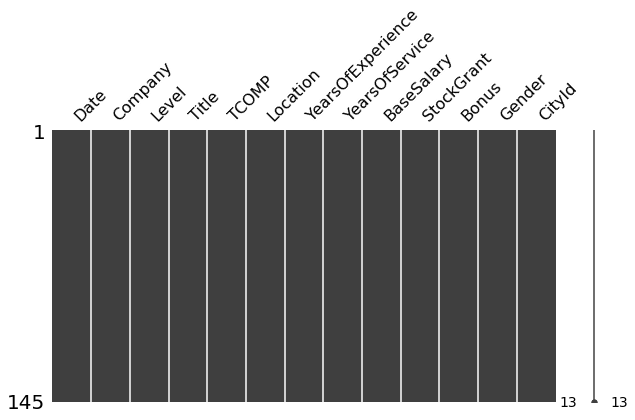

In [36]:
msno.matrix(CompaniesInIrelanddf, figsize=(10, 5))

In [38]:
CompaniesInIrelanddf.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [42]:
#Filter Base Salary outliers - filter top and bottom 5% 
CompaniesInIrelanddf_filtered = CompaniesInIrelanddf[CompaniesInIrelanddf['BaseSalary'].between(df['BaseSalary'].quantile(.05),df['BaseSalary'].quantile(.95))]
CompaniesInIrelanddf_filtered = CompaniesInIrelanddf[CompaniesInIrelanddf['TCOMP'].between(df['TCOMP'].quantile(.05),df['BaseSalary'].quantile(.95))]

In [43]:
CompaniesInIrelanddf_filtered.to_csv('CompaniesInIreland_SalaryData_filtered.csv')

# Visualize our Data

<AxesSubplot:xlabel='Company,Gender'>

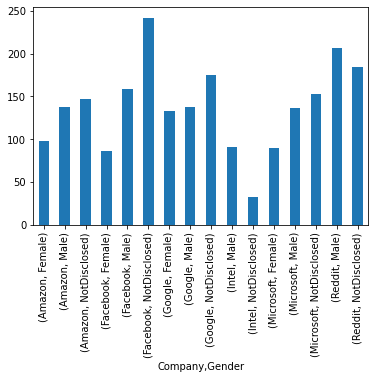

In [58]:
#Visualise TCOMP by Company and Gender
CompaniesInIrelanddf_filtered.groupby(['Company','Gender']).mean()['TCOMP'].plot.bar()
#Label Axis

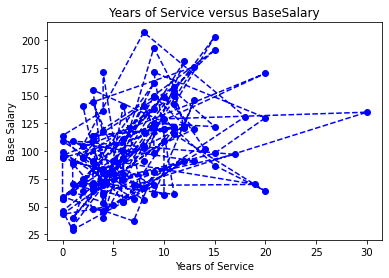

In [57]:
# Define a function called CorinnasPlotFunction - to fulfil scoring criteria
def CorinnasPlotFunction(x, y,color,linestyle,marker):
# Plot the inputs x,y in the provided colour
   ax.plot(x, y, color=color, linestyle=linestyle, marker=marker)

fig, ax = plt.subplots()
CorinnasPlotFunction(CompaniesInIrelanddf_filtered["YearsOfExperience"],CompaniesInIrelanddf_filtered["BaseSalary"], "b","--",'o')
ax.set_title("Years of Service versus BaseSalary")
ax.set_xlabel("Years of Service")
ax.set_ylabel("Base Salary")
plt.show()

Corinnas Project 
Reference https://towardsdatascience.com/a-beginners-guide-to-grabbing-and-analyzing-salary-data-in-python-e8c60eab186e